#

<h1><center>Exploratory Data Analysis Of Crime in Chicago</center></h1>
<center><img src="https://gisgeography.com/wp-content/uploads/2018/06/Chicago-Illinois-Skyline.png" align="center"/></center>



<a id='1'></a>
# 1 Introduction
The objective of this notebook is to present an extensive exploratory data analysis of crime in chicago using the **Chicago Crime Dataset**

In this notebook, I am going to explore more about crime in Chicago and try to answer few questions:

* Has the frequency of crime in Chicago changed over the years?
* where does crime occure the most?
* Is there any relationship between crime rate and Arrest rate?

Data source :

* <a href="https://www.kaggle.com/datasets/chicago/chicago-crime" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle">
 </a>

* <a href="https://1drv.ms/u/s!ArhE6TZzYOy0gaZhFH_B3wthGUSjyQ?e=NR2gjH" target="_blank">
    <img src= "https://img.shields.io/badge/OneDrive-white?style=for-the-badge&logo=Microsoft%20OneDrive&logoColor=0078D4" alt="ONEDRIVE">
 </a>

GitHub Project Repository :
* [Chicago crime dataset EDA](https://github.com/SaliuA/Circle_17_Chicago_Crime_EDA)

### This project also serves as an assignment for the AltSchool Data science second semester assesment
* [Alt school Data science](https://altschoolafrica.com/)

<a id='1.1'></a>
## 1.1 Summary

* Dataset mostly has categorical variables
* Performed univariate and multivariate Analysis

<a id='2'></a>
# 2 Libraries & Configurations

<a id='2.1'></a>
## 2.1 Libraries

In [1]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from datetime import datetime #for 
from scipy import stats     # for statistics
from IPython.display import Markdown, display # for markdown function

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))
#function to check for number of rows and colunms
def shape(df):
    print(f"There are {df.shape[0]:,} rows and {df.shape[1]} columns")

#function to check the percentage of missing values in each colunm
def missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean().reset_index()
    missing_percentage.columns = ['Column', 'Missing Percentage']

    # Convert the proportion to percentage by multiplying by 100
    missing_percentage['Missing Percentage'] *= 100
    return missing_percentage
#function to drop redundant colunms
def col_to_drop(df, columns):
    """
    Drops columns from a DataFrame with the axis set to 1 and inplace set to True.

    Parameters:
    - df: Pandas DataFrame
    - columns: A list containing columns to be dropped

    Returns:
    - Remaining the colunms in the pandas dataframe
    """
    if isinstance(columns, list):
        for column in columns:
            try:
                df.drop(column, axis=1, inplace=True)
            except KeyError:
                print(f"{column} does not exist in the DataFrame")
        shape(df)
        return df.columns
    else:
        print("Please enter a list of columns to be dropped")
#function to crete season,day and month columns
def new_col(df, cols):
    """
    Creates the 'day', 'month', and 'season' columns from the 'Date' column.

    Parameters:
    - df: Pandas DataFrame
    - cols: A list containing the names of the day and month columns

    Returns:
    - The modified dataframe
    """
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Fall',
        10: 'Fall', 11: 'Fall', 12: 'Winter'
    }

    # Check if the 'Date' column exists
    if 'Date' in df.columns:
        df['day'] = df['Date'].dt.day
        df['month'] = df['Date'].dt.month
        df['season'] = df['month'].map(month_to_season)
    else:
        print("Date column does not exist.")

    return df
# functio to Create a new column 'time_of_day' based on the '24 hour' column
def categorize_time(hour):
    if 4 <= int(hour.split(':')[0]) < 12:
        return 'Morning'
    elif 12 <= int(hour.split(':')[0]) < 18:
        return 'Afternoon'
    elif 18 <= int(hour.split(':')[0]) < 20:
        return 'Evening'
    else:
        return 'Night'
# pio.renderers.default='notebook' # to display plotly graph
%matplotlib inline

<a id='2.2'></a>
## 2.2 Configurations

In [2]:
# padding value
left_padding = 21

# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid")


<a id='3'></a>
# 3 Descriptive Analysis

In [3]:
#loading the dataset
df_crime=pd.read_csv(r"C:\Users\Podos\OneDrive\Desktop\Data_science\Dataset\Crimes_-_2001_to_Present.csv\crime_data_chicago.csv")
#viewing the dataset
df_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
#checking the number of rows and colunms
shape(df_crime)

There are 2,278,726 rows and 23 columns


In [5]:
#checking information about the dataset
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

<a id='3.1'></a>
## 3.1 Summary of Categorical Features

In [6]:
df_crime.describe(include=['object']).T

,count,unique,top,freq
Case Number,2278725,2278678,HK172551,3
Date,2278726,1343546,01/01/2008 12:01:00 AM,81
Block,2278726,54347,100XX W OHARE ST,4878
IUCR,2278726,392,0820,184891
Primary Type,2278726,35,THEFT,479375
Description,2278726,515,SIMPLE,268418
Location Description,2275849,198,STREET,590957
FBI Code,2278726,26,06,479375
Updated On,2278726,4461,02/10/2018 03:50:01 PM,836558
Location,2254741,545376,"(41.976290414, -87.905227221)",4227


<a id='3.2'></a>
## 3.2 Checking Duplicates

In [7]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_crime.index),len(df_crime.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 2278726
Unique observations: 2278726


**No duplicates Found!**

<a id='3.2.1'></a>
### 3.2.1 Dropping duplicate colunms

In [8]:
#creating a list of duplicated colunms  to drop
col= ['Unnamed: 0', 'ID','IUCR','FBI Code','X Coordinate', 'Y Coordinate','Location']
#calling the col_to_drop function
col_to_drop(df_crime,col)

There are 2,278,726 rows and 16 columns


Index(['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'Year', 'Updated On', 'Latitude',
       'Longitude'],
      dtype='object')

<a id='3.3'></a>
## 3.3 Unique Values

In [9]:
printmd("**Unique Values By Features**")
for feature in df_crime.columns:
    uniq = (df_crime[feature]).nunique()
    print(feature.ljust(left_padding),uniq)

**Unique Values By Features**

Case Number           2278678
Date                  1343546
Block                 54347
Primary Type          35
Description           515
Location Description  198
Arrest                2
Domestic              2
Beat                  304
District              23
Ward                  50
Community Area        78
Year                  22
Updated On            4461
Latitude              544919
Longitude             544655


<a id='4'></a>
# 4 Data Wrangling

<a id='4.1'></a>
## 4.1 Missing Values

In [10]:
#checking for missing data
printmd("**missing Values By Features**")
df_crime.isnull().sum()

**missing Values By Features**

Case Number                  1
Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
dtype: int64

In [11]:
#checking the percentage of missing values in each colunm
printmd("**percentage of missing Values By Features**")
missing_value_percentage(df_crime)

**percentage of missing Values By Features**

,Column,Missing Percentage
0,Case Number,0.000044
1,Date,0.000000
2,Block,0.000000
3,Primary Type,0.000000
4,Description,0.000000
5,Location Description,0.126255
6,Arrest,0.000000
7,Domestic,0.000000
8,Beat,0.000000
9,District,0.000527


In [12]:
#droping rows with missing data
df_crime.dropna(inplace=True)

In [13]:
#checking the number of rows and colunms after droping missing values
shape(df_crime)


There are 2,070,581 rows and 16 columns


In [14]:
#outlierers in the Latitude colunm
outlier=df_crime["Latitude"].min()
df_crime=df_crime[df_crime["Latitude"]!=outlier]

<a id='4.2'></a>

## 4.2 Data Transformation

In [15]:
#converting the date column into a datetime object
df_crime.Date=pd.to_datetime(df_crime.Date,format='%m/%d/%Y %I:%M:%S %p')

<a id='4.2'></a>

## 4.3 Feature Engineering

In [16]:
#calling the new_col function
new_col(df_crime,["day","month","season"])
#re-indexing the colunm positions
df_crime=df_crime.reindex(columns=['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'day', 'month', 'Year', 'season',
       'Updated On', 'Latitude', 'Longitude'])

In [17]:
#Creating the hour colunm
df_crime['hour'] = df_crime["Date"].dt.strftime('%H:%M')

df_crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,day,month,Year,season,Updated On,Latitude,Longitude,hour
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,26,7,2008,Summer,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,31,7,2018,Summer,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,27,4,2007,Spring,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,23,7,2018,Summer,07/30/2018 03:52:24 PM,41.881217,-87.730590,08:55
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,11,7,2021,Summer,07/18/2021 04:56:02 PM,41.874174,-87.668082,06:40


In [18]:

# Apply the categorization function to create the new column
df_crime['time_of_day'] = df_crime['hour'].apply(categorize_time)
df_crime.head()


,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Community Area,day,month,Year,season,Updated On,Latitude,Longitude,hour,time_of_day
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,46.0,26,7,2008,Summer,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30,Afternoon
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,47.0,31,7,2018,Summer,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57,Morning
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,12.0,27,4,2007,Spring,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30,Morning
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,26.0,23,7,2018,Summer,07/30/2018 03:52:24 PM,41.881217,-87.730590,08:55,Morning
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,28.0,11,7,2021,Summer,07/18/2021 04:56:02 PM,41.874174,-87.668082,06:40,Morning


In [19]:
# create the names of the day of the week colunm
df_crime['day_of_week'] = df_crime['Date'].apply(lambda x: x.day_name())

In [20]:
df_crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,day,month,Year,season,Updated On,Latitude,Longitude,hour,time_of_day,day_of_week
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,26,7,2008,Summer,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30,Afternoon,Saturday
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,31,7,2018,Summer,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57,Morning,Tuesday
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,27,4,2007,Spring,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30,Morning,Friday
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,23,7,2018,Summer,07/30/2018 03:52:24 PM,41.881217,-87.730590,08:55,Morning,Monday
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,11,7,2021,Summer,07/18/2021 04:56:02 PM,41.874174,-87.668082,06:40,Morning,Sunday


In [21]:
#re-arranging the colunms
df_crime=df_crime.reindex(columns=['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'day', 'month', 'Year', 'season','hour','time_of_day','day_of_week',
       'Updated On', 'Latitude', 'Longitude'])

In [22]:
df_crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,day,month,Year,season,hour,time_of_day,day_of_week,Updated On,Latitude,Longitude
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,26,7,2008,Summer,14:30,Afternoon,Saturday,02/28/2018 03:56:25 PM,41.739980,-87.555120
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,31,7,2018,Summer,10:57,Morning,Tuesday,08/07/2018 04:02:59 PM,41.726922,-87.599747
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,27,4,2007,Spring,10:30,Morning,Friday,02/28/2018 03:56:25 PM,41.994138,-87.734959
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,23,7,2018,Summer,08:55,Morning,Monday,07/30/2018 03:52:24 PM,41.881217,-87.730590
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,11,7,2021,Summer,06:40,Morning,Sunday,07/18/2021 04:56:02 PM,41.874174,-87.668082


**Data Types Distribution after Data wrangling**

In [23]:
printmd("**Data Types**<br>")
df_crime.dtypes.value_counts()

**Data Types**<br>

object            10
float64            5
bool               2
int64              2
int32              2
datetime64[ns]     1
Name: count, dtype: int64

<a id='5.0'></a>

## 5.0 Data Interpretation

<a id='5.1'></a>

## 5.1 Frequency of Crime

### <i>Frequency of Crime by year<i>

lets take a look at the trend of crime over the years, is crime increasing or decreasing?


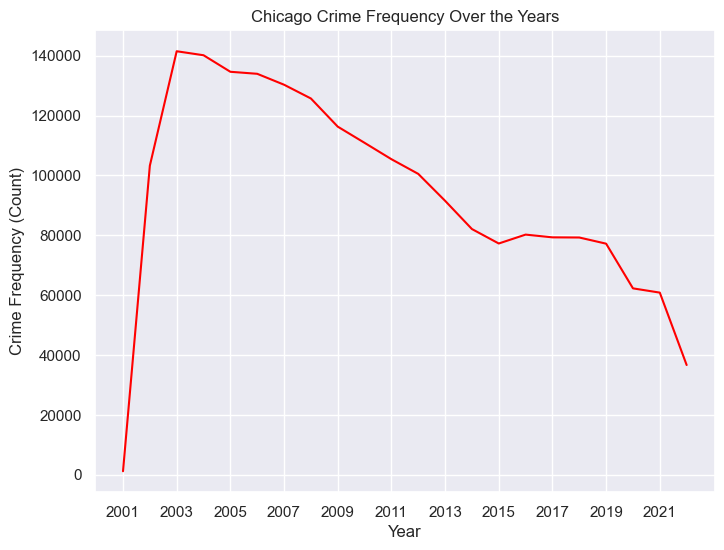

The year 2003 has the highest recorded instances of the occurence of crime with 2001 having the lowest occurence. There is a noticable decline in the crime count since 2001,we can give credence to the work of law enforcemnt officers.

In [24]:
#showing distribution of crime by year
crime_year=df_crime['Year'].value_counts().sort_values(ascending=False).reset_index()
# Set Seaborn theme
plt.figure(figsize=(8, 6))  # Adjust the width (8) and height (6) as desired
sns.lineplot(crime_year,x="Year",y="count",color="red")
plt.xticks(range(min(df_crime["Year"]), max(df_crime["Year"])+1, 2))  # Adjust the step value (5) as needed
plt.ylabel('Crime Frequency (Count)')
plt.title('Chicago Crime Frequency Over the Years')
plt.show()
printmd(f"The year {crime_year.iloc[0]["Year"]} has the highest recorded instances of the occurence of crime with {crime_year.iloc[-1]["Year"]} having the lowest occurence. There is a noticable decline in the crime count since 2001,we can give credence to the work of law enforcemnt officers.")

lets take alook at the thrend of the top 12 crime types over the years. Data reaveals a decline in general crime count over the years but are certain crime types increasing?

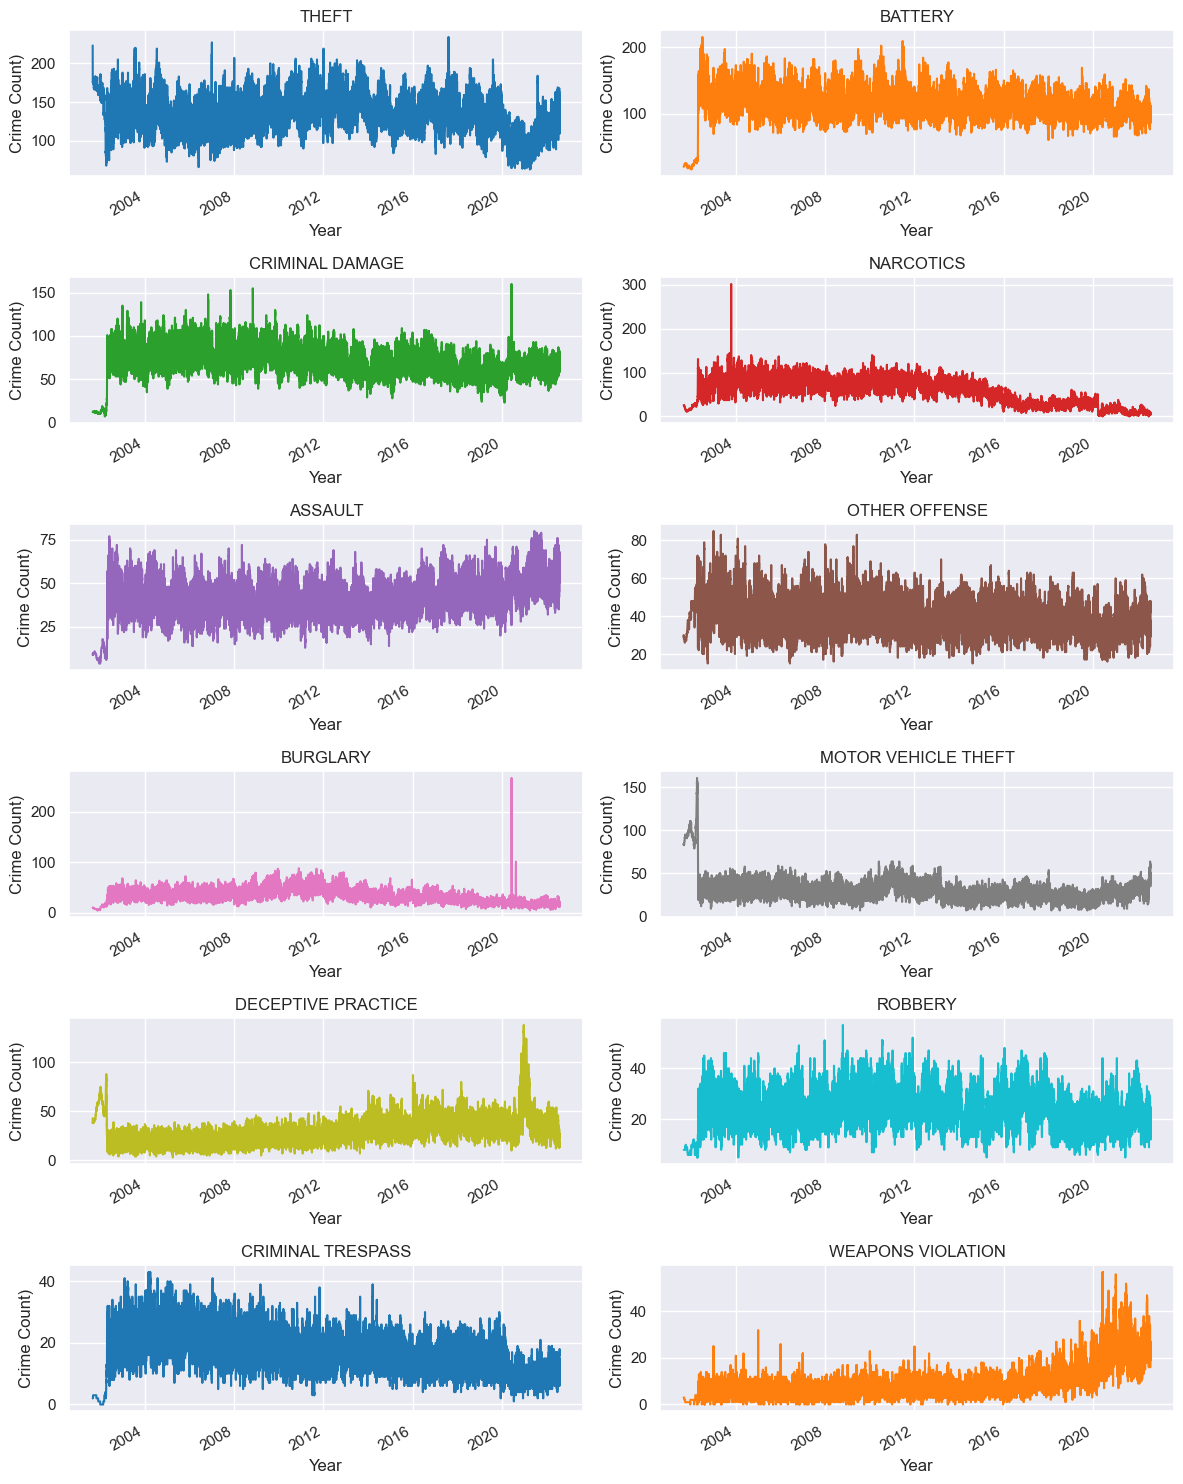

The visualizing revelas a general decline in the amount of crime commited inline with our previous plot but there has been an uptick in theft since 2020.Law enforcement officers would have to take a closer look at cases of theft

In [25]:
# Retrieve the top 12 crime types
crime_top = df_crime["Primary Type"].value_counts()[:12].index.to_list()

# Filter the DataFrame for the top 12 crime types
crime_top_twelve = df_crime[df_crime["Primary Type"].isin(crime_top)]

# Pivot table to get crime counts by date and primary type
crime_count_date = crime_top_twelve.pivot_table('Case Number', aggfunc=np.size,
                                              columns='Primary Type', index=df_crime.Date, fill_value=0)
crime_count_date.index = pd.DatetimeIndex(crime_count_date.index)

# Rolling sum over 365 days for smoother trends
crime_count_rolling = crime_count_date.rolling(365).sum()

# Plotting
fig, axes = plt.subplots(nrows=len(crime_top) // 2, ncols=2, figsize=(12, 15))
colors = sns.color_palette("tab10")  # Get a color palette

for i, (crime_type, ax) in enumerate(zip(crime_top, axes.flatten())):
    color = colors[i % len(colors)]  # Cycle through colors
    crime_count_rolling[crime_type].plot(ax=ax, color=color)
    ax.set_title(crime_type)
    ax.set_xlabel('Year')
    ax.set_ylabel('Crime Count)')
    ax.grid(True)

plt.tight_layout()
plt.show()
printmd("The visualizing revelas a general decline in the amount of crime commited inline with our previous plot but there has been an uptick in theft since 2020.Law enforcement officers would have to take a closer look at cases of theft")

lets visualize this using a heapmap 

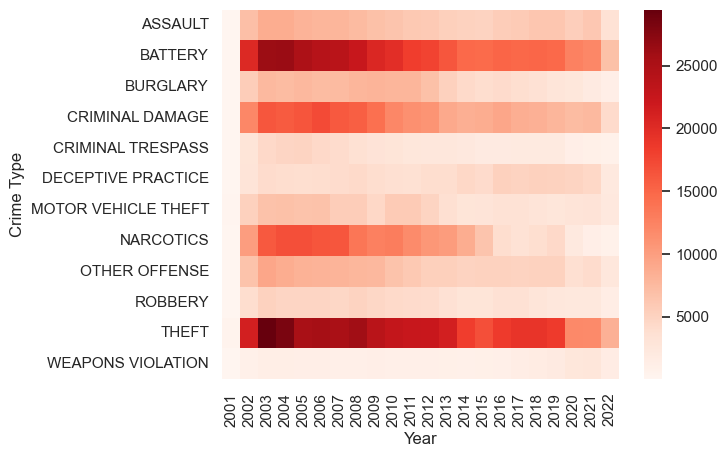

The heatmap is inline with our other plots,there is a general decline in crime with a resurgence of THEFT

In [26]:
crime_counts = crime_top_twelve.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
# Pivot the data for easier plotting
crime_counts_pivot = crime_counts.pivot(index='Primary Type', columns='Year', values='Count').fillna(0)
# Create the heatmap
ax=sns.heatmap(crime_counts_pivot, cmap='Reds')
ax.set_ylabel("Crime Type")
# Show the plot
plt.show()
printmd("The heatmap is inline with our other plots,there is a general decline in crime with a resurgence of THEFT")


### <i>Frequency of Crime by months<i>

lets take a look at the distribution of crime by months.Do certain months experience lower crime occurance than others?

,month,count
0,July,198319
1,August,191098
2,May,190588
3,June,190566
4,October,180502


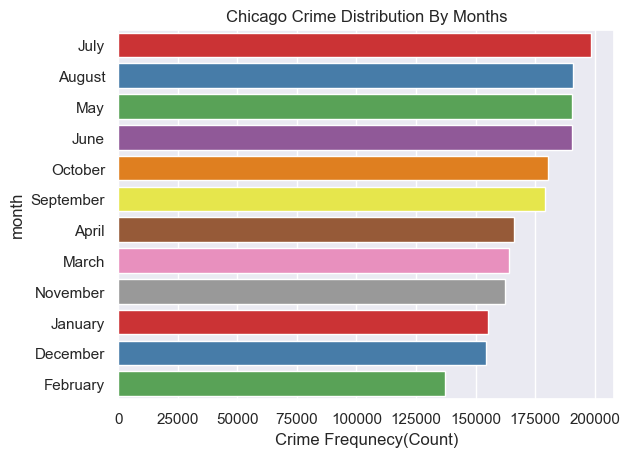

July has the highest recorded instances of the occurence of crime with February         having the lowest occurence.The first and fourth quater of the year have lower crime occurences.This information should help in planning         your next vacation in Chicago

In [27]:
#showing distribution of crime by month
df_crime_month=df_crime['month'].value_counts().sort_values(ascending=False).reset_index()
# Create a dictionary mapping numbers to month names
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Map the 'month' column in the DataFrame
df_crime_month['month'] = df_crime_month['month'].map(month_dict)
display(df_crime_month.head())
sns.barplot(df_crime_month,y="month",x="count",hue="month",legend=False,palette="Set1").set_xlabel('Crime Frequnecy(Count)')
plt.title('Chicago Crime Distribution By Months')
plt.show()
printmd(f"{df_crime_month.iloc[0]["month"]} has the highest recorded instances of the occurence of crime with {df_crime_month.iloc[-1]["month"]}\
         having the lowest occurence.The first and fourth quater of the year have lower crime occurences.This information should help in planning \
        your next vacation in Chicago")

### <i>Frequency of Crime by day of the month<i>
lets take a look at the distribution of crime by day of the month.Do certain days experience lower crime occurance than others? lets visualize the patterns

,day,count
0,1,79348
1,15,69749
2,20,69063
3,17,68638
4,10,68510


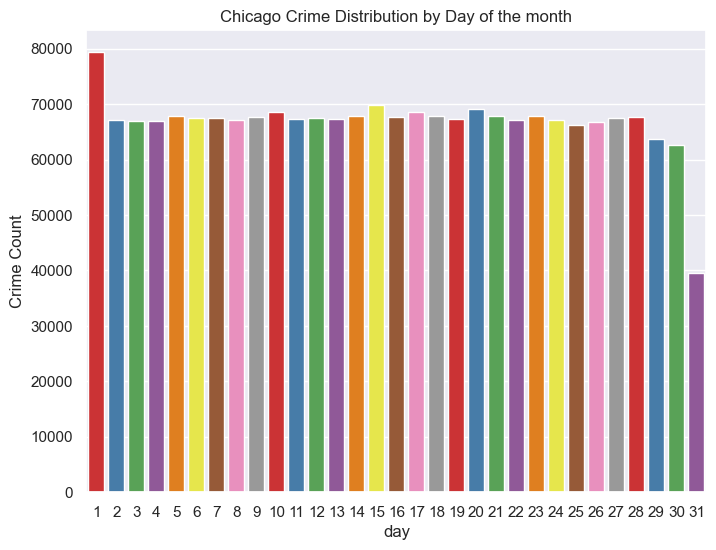

The 1st day of the month has the highest count of crime occurence with 31th having the lowest occurence.        The crime count is generally uniformly distributed with a peak on the 1st and dip on the 31st day of the month

In [28]:
#showing distribution of crime by day
df_crime_day=df_crime['day'].value_counts().sort_values(ascending=False).reset_index()
display(df_crime_day.head(5))
plt.figure(figsize=(8, 6))  # Adjust the width (8) and height (6) as desired
sns.barplot(df_crime_day,x="day",y="count",hue="day",legend=False,palette="Set1").set_ylabel('Crime Count')
plt.title('Chicago Crime Distribution by Day of the month')
plt.show()
printmd(f"The {df_crime_day.iloc[0]["day"]}st day of the month has the highest count of crime occurence with {df_crime_day.iloc[-1]["day"]}th having the lowest occurence.\
        The crime count is generally uniformly distributed with a peak on the 1st and dip on the 31st day of the month")


### <i>Frequency of Crime by day of the week<i>
we have seen than crime is almost uniformly distributed by day of the month,lets take a look at the distribution of crime by day of the week.Do certain days of the week experience lower crime occurance than others? lets visualize the patterns.

,day_of_week,count
0,Friday,311378
1,Wednesday,297795
2,Saturday,296892
3,Tuesday,295667
4,Thursday,294207


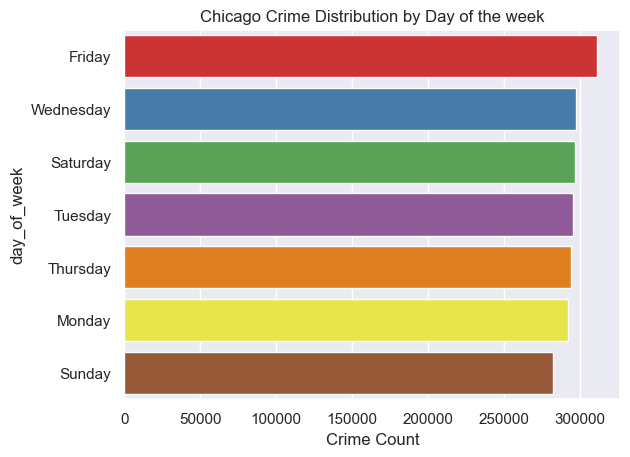

Crime occurence is uniformly distributed on each day of the week. The data reveals the relentlesness of criminals         to commit crime which gives more credence to the job our law enforcement officers do to keep us safe

In [29]:
#showing distribution of crime by day of the week
df_crime_week=df_crime['day_of_week'].value_counts().sort_values(ascending=False).reset_index()
display(df_crime_week.head(5))
sns.barplot(df_crime_week,x="count",y="day_of_week",hue="day_of_week",legend=False,palette="Set1").set_xlabel('Crime Count')
plt.title('Chicago Crime Distribution by Day of the week')
plt.show()
printmd(f"Crime occurence is uniformly distributed on each day of the week. The data reveals the relentlesness of criminals\
         to commit crime which gives more credence to the job our law enforcement officers do to keep us safe")

### <i>Frequency of Crime by Season<i>
Do certain seasons experience lower crime occurance than others? lets visualize the patterns.

,season,count
0,Summer,579983
1,Fall,522141
2,Spring,521093
3,Winter,447336


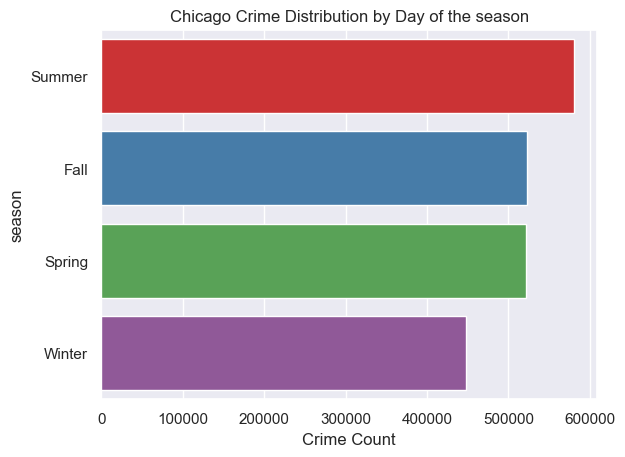

Summer has the highest count, while Winter has      the lowest count of crime occurence.The data reveals the relentlesness of the criminals to comit crime         is broken by snow.

In [30]:
#showing distribution of crime by season
df_crime_season=df_crime['season'].value_counts().sort_values(ascending=False).reset_index()
display(df_crime_season.head(5))
sns.barplot(df_crime_season,x="count",y="season",hue="season",legend=False,palette="Set1").set_xlabel('Crime Count')
plt.title('Chicago Crime Distribution by Day of the season')
plt.show()
printmd(f"{df_crime_season.iloc[0]["season"]} has the highest count, while {df_crime_season.iloc[-1]["season"]} has\
      the lowest count of crime occurence.The data reveals the relentlesness of the criminals to comit crime \
        is broken by snow.")

<a id='5.2'></a>

## 5.2 Types Of Crime

We have seen the distribution of crimes over years, months, days and seasons. Lets look at the type of crime being commited

### <i>Most frequent crime types<i>
Lets take a look at the most frequent crime type 

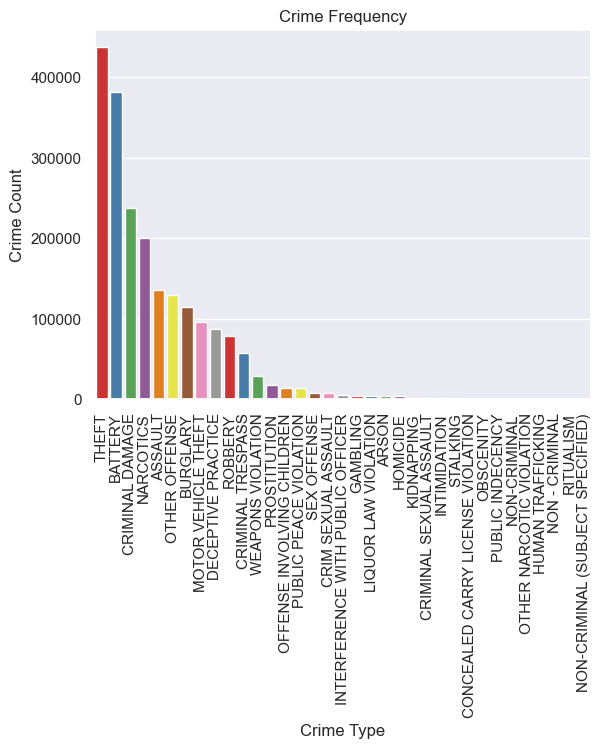

The data reveals THEFT has the highest count


In [31]:
#groupby Primary Type to check the most frequent crime type
crime_type=df_crime.groupby("Primary Type")["Primary Type"].value_counts().sort_values(ascending=False).reset_index()
crime_type.head()
ax=sns.barplot(crime_type,x="Primary Type",y="count",hue="Primary Type",legend=False,palette="Set1")
ax.set_ylabel('Crime Count')
ax.set_xlabel('Crime Type')
plt.xticks(rotation=90)
plt.title('Crime Frequency')
plt.show()
print(f"The data reveals {crime_type.iloc[0]["Primary Type"]} has the highest count")


### <i>where does crime happen the most<i>
Its important to know the location with the most crime occurence

,Location Description,count
0,STREET,530422
1,RESIDENCE,342699
2,APARTMENT,239322
3,SIDEWALK,203850
4,OTHER,72076
5,PARKING LOT/GARAGE(NON.RESID.),54754
6,ALLEY,46316
7,SMALL RETAIL STORE,39603
8,"SCHOOL, PUBLIC, BUILDING",39145
9,RESIDENCE-GARAGE,36433


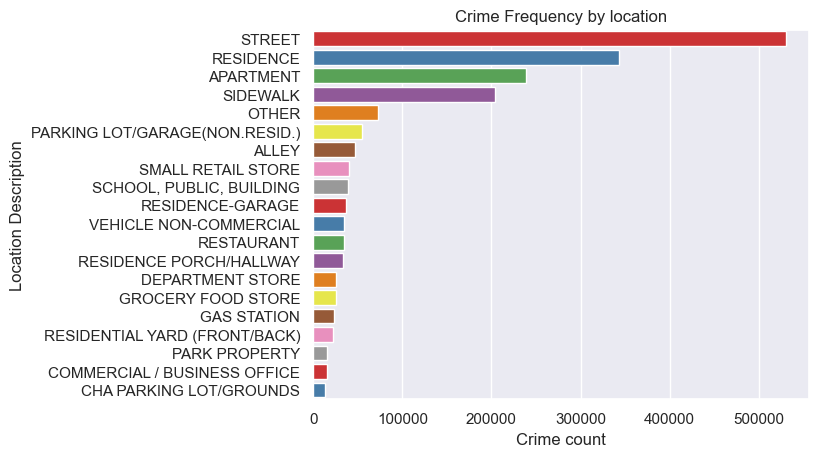

29% of all crime happend on the STREET.More law enforcement officers are required to man the streets

In [32]:
# Get the most frequent location descriptions
crime_locations = df_crime['Location Description'].value_counts(ascending=False).reset_index().head(20)
display(crime_locations)
#bar plot of crime location againt count
sns.barplot(crime_locations,x="count",y="Location Description",hue="Location Description",legend=False,palette="Set1").set_xlabel('Crime count')
plt.title('Crime Frequency by location')
plt.show()
printmd(f"{round(crime_locations["count"].iloc[0]*100/sum(crime_locations["count"]))}% of all crime happend on the {crime_locations["Location Description"].iloc[0]}.More law enforcement officers are required to man the streets")

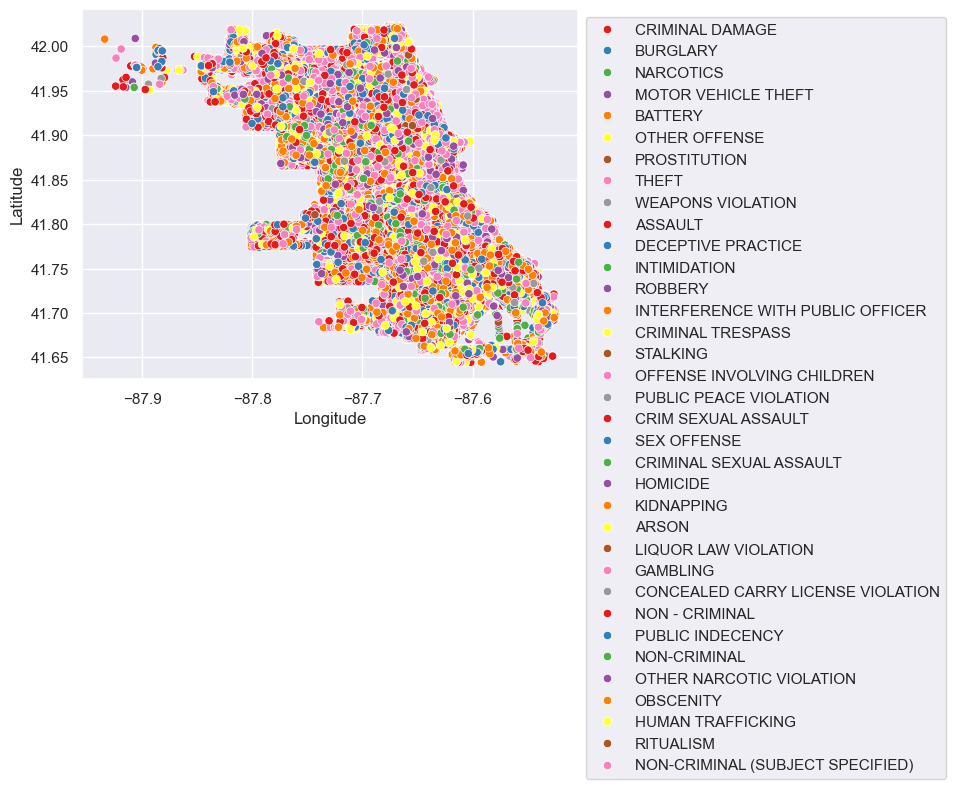

In [33]:
#vizualizing the location of crime type
location_list=crime_locations.head(10)["Location Description"].unique().tolist()
crime_subset=df_crime[df_crime["Location Description"].isin(location_list)]
# Plot the scatterplot of latitude and logitude with a hue of Location description
ax = sns.scatterplot(data=crime_subset, y="Latitude", x="Longitude", hue="Primary Type", palette="Set1")
# Move the legend to the side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<a id='5.3'></a>

## 5.3 Frequency of Arrest
Let us visualize the efforts by law enforcemnet agencies i comabating crime in chicago

### <i>Crime rate<i>

    Year   count   rate
0   2003  141488  388.0
1   2004  140152  384.0
2   2005  134629  369.0
3   2006  133955  367.0
4   2007  130308  357.0
5   2008  125711  344.0
6   2009  116306  319.0
7   2010  110894  304.0
8   2011  105427  289.0
9   2002  103271  283.0
10  2012  100520  275.0
11  2013   91530  251.0
12  2014   82093  225.0
13  2016   80235  220.0
14  2017   79317  217.0
15  2018   79265  217.0
16  2015   77264  212.0
17  2019   77205  212.0
18  2020   62277  171.0
19  2021   60855  167.0
20  2022   36671  100.0
21  2001    1180    3.0


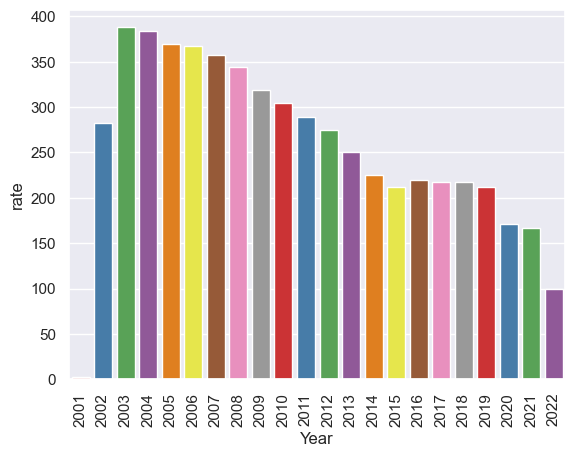

The fall of the crime rate is consitent with our ealier findings

In [34]:
crime_rate= df_crime["Year"].value_counts().reset_index()
crime_rate["rate"]= round(crime_year["count"]/365)
print(crime_rate)
sns.barplot(x="Year",y="rate",data=crime_rate, hue="Year",palette="Set1",legend=False)

plt.xticks(rotation=90)
plt.show()
printmd("The fall of the crime rate is consitent with our ealier findings")

### <i>Arrest rate<i>

lets take a look at the arrest proportion and its effect on the crime rate

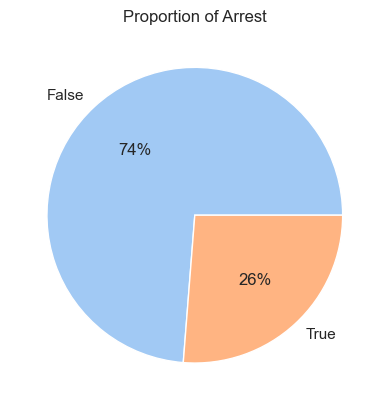

Only 26% of recorded crimes commited lead to arrest

In [35]:
arrest_proportion= df_crime["Arrest"].value_counts()
arrest_proportion
labels = arrest_proportion.index
colors = sns.color_palette('pastel')[0:len(arrest_proportion)]
# Create the pie chart
plt.pie(arrest_proportion, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Proportion of Arrest")
plt.show()
printmd("Only 26% of recorded crimes commited lead to arrest")

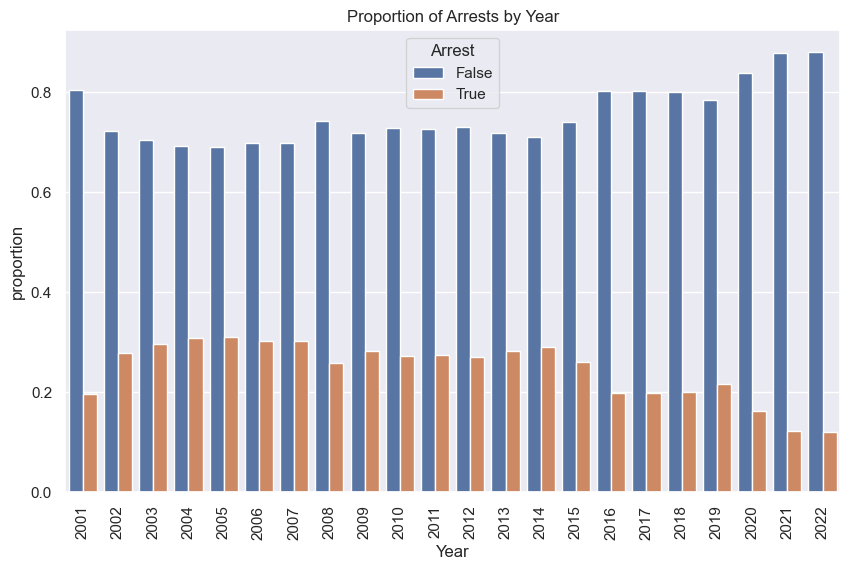

The proportion of arrest as been in decline since 2002 revealing that the arrest ratio has no corrolation with the declining crime rate

In [36]:
df= df_crime.groupby("Year")['Arrest'].value_counts(normalize=True).reset_index(name="proportion")
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='proportion', hue='Arrest', data=df)
plt.xticks(rotation=90)
plt.title('Proportion of Arrests by Year')
plt.show()
printmd("The proportion of arrest as been in decline since 2002 revealing that the arrest ratio has no corrolation with the declining crime rate")

<a id='6.0'></a>

## 6.0 Conclusion

### The data exploration revealed that frequency of crime has been in a steady decline since 2002 with most crimes occuring on the street of Chicago and Theft being the most frequent crime commited. The arrest rate has no corrolation with the falling crim rate.